 1. Load the Dataset:


 • Read the dataset into a pandas DataFrame.


 • Display the first few rows and perform exploratory data analys

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/MyDrive/Workshop/diabetes.csv')
data #display rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.isnull().sum() #null values


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
missing_info = data.isnull().sum() / len(data) * 100
for column in data.columns:
 if missing_info[column] > 10: # If more than 10% missing
  data[column].fillna(data[column].mean(), inplace=True)
 else: # If less than 10% missing
  data.dropna(subset=[column], inplace=True)

# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())


Data after processing:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values after processing:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outc

 3. Feature Engineering:


 • Separate the feature matrix (X) and target variable (y).


 • Perform a train- test split from scratch using a 70% − 30% ratio.

In [ ]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

def train_test_split_scratch(X, y, test_size=0.4, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [ ]:
def euclidean_distance(point1, point2):
 # Check if the points are of the same dimension
 if point1.shape != point2.shape:
  raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
 # Calculate the Euclidean distance
 distance = np.sqrt(np.sum((point1- point2) ** 2))
 return distance

# Test case for the function
try:
 # Define two points
 point1 = np.array([3, 4])
 point2 = np.array([0, 0])
 # Calculate the distance
 result = euclidean_distance(point1, point2)
 # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
 expected_result = 5.0
 assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
 print("Test passed successfully!")
except ValueError as ve:
 print(f"ValueError: {ve}")
except AssertionError as ae:
 print(f"AssertionError: {ae}")
except Exception as e:
 print(f"An unexpected error occurred: {e}")

# FunctionforKNNpredictionforasinglequery
def knn_predict_single(query,X_train,y_train,k=7):
 distances = [euclidean_distance(query,x) for x in X_train]
 sorted_indices=np.argsort(distances)
 nearest_indices=sorted_indices[:k]
 nearest_labels=y_train[nearest_indices]
 prediction=np.bincount(nearest_labels).argmax()
 return prediction

# FunctiontotestKNNforalltestsamples
def knn_predict(X_test,X_train,y_train,k=7):
  predictions=[knn_predict_single(x,X_train,y_train,k) for x in X_test]
  return np.array(predictions)

def compute_accuracy(y_true,y_pred):
 correct_predictions=np.sum(y_true==y_pred)
 total_predictions=len(y_true)
 accuracy=(correct_predictions/total_predictions)*100
 return accuracy

try:
 #Make predictions on the entire test set
 predictions=knn_predict(X_test,X_train,y_train,k=5)
 #Computetheaccuracy
 accuracy=compute_accuracy(y_test,predictions)
 #Printtheaccuracy
 print(f"Accuracy of the KNN model on the test set:{accuracy:.2f}%")
except Exception as e:
 print(f"An unexpected error occurred during prediction or accuracy computation:{e}")

Test passed successfully!
Accuracy of the KNN model on the test set:68.70%


In [ ]:
# Problem - 2 - Experimentation:

# 1. Repeat the Classification Task:
# • Scale the Feature matrix X.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k=3

# • Use the scaled data for training and testing the kNN Classifier.
# • Record the results.
y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train,k )

accuracy_scaled = compute_accuracy(y_test, y_pred_scaled)

print(f"Accuracy of KNN classifier with 3 on scaled data: {accuracy_scaled:.2f}")

Accuracy of KNN classifier with 3 on scaled data: 70.87


In [ ]:
# 2. Comparative Analysis: Compare the Results -
# • Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.
y_pred_original = knn_predict(X_test, X_train, y_train, k)
accuracy_original = compute_accuracy(y_test, y_pred_original)

print(f"Accuracy of KNN classifier with k={k} on original data: {accuracy_original:.2f}")
print(f"Accuracy of KNN classifier with k={k} on scaled data: {accuracy_scaled:.2f}")

Accuracy of KNN classifier with k=3 on original data: 67.39
Accuracy of KNN classifier with k=3 on scaled data: 70.87


In [ ]:

# Problem - 3 - Experimentation with k:
# 1. Vary the number of neighbors - k:

k_values = list(range(1, 16))  # k values from 1 to 15
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

# • Run the KNN model on both the original and scaled datasets for a range of:
# k= 1, 2, 3, . . . 15
# • For each k, record:

for k in k_values:
    # Time for original data
    start_time = time.time()
    y_pred_original = knn_predict(X_test, X_train, y_train, k)
    time_taken_original = time.time() - start_time
    accuracy_original.append(compute_accuracy(y_test, y_pred_original))
    time_original.append(time_taken_original)

    # Time for scaled data
    start_time = time.time()
    y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
    time_taken_scaled = time.time() - start_time
    accuracy_scaled.append(compute_accuracy(y_test, y_pred_scaled))
    time_scaled.append(time_taken_scaled)

    # Print progress every 5 steps to check status
    if k % 5 == 0:
        print(f"Completed k={k}...")

print(f"Length of k_values: {len(k_values)}")
print(f"Length of time_scaled: {len(time_scaled)}")

print("k\tAccuracy (Original)\tTime (Original)\tAccuracy (Scaled)\tTime (Scaled)")
for k, acc_orig, time_orig, acc_scaled, time_scaled in zip(k_values, accuracy_original, time_original, accuracy_scaled, time_scaled):
    print(f"{k}\t{acc_orig:.4f}\t\t{time_orig:.4f}\t\t{acc_scaled:.4f}\t\t{time_scaled:.4f}")

Completed k=5...
Completed k=10...
Completed k=15...
Length of k_values: 15
Length of time_scaled: 15
k	Accuracy (Original)	Time (Original)	Accuracy (Scaled)	Time (Scaled)
1	68.6957		1.2562		63.4783		1.5531
2	72.6087		1.3836		66.0870		0.8240
3	67.3913		0.8420		70.8696		1.5134
4	72.1739		1.7631		68.6957		1.6432
5	68.6957		1.7347		70.0000		1.4548
6	70.0000		0.8268		69.1304		0.8183
7	69.1304		0.7905		69.5652		0.8078
8	71.3043		0.8086		68.6957		0.8158
9	70.0000		0.8196		69.5652		0.7989
10	71.7391		0.8077		69.5652		0.8074
11	73.0435		0.8194		70.8696		0.8125
12	73.9130		1.2953		72.1739		1.4370
13	74.3478		1.4450		71.3043		1.0990
14	72.6087		0.8045		71.3043		0.8060
15	73.9130		0.8054		73.9130		0.8011


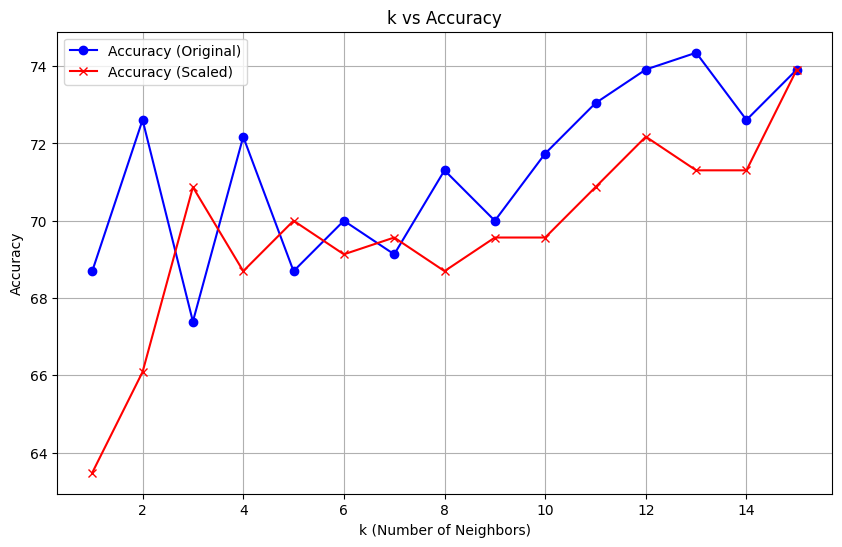

In [ ]:
# 2. Visualize the Results:
# • Plot the following graphs:
# – k vs. Accuracy for original and scaled datasets.
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_original, label="Accuracy (Original)", color='blue', marker='o')
plt.plot(k_values, accuracy_scaled, label="Accuracy (Scaled)", color='red', marker='x')
plt.title("k vs Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()